In [1]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

openjdk-8-jdk-headless is already the newest version (8u275-b01-0ubuntu1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [2]:
# Let's import the libraries we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

In [3]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [4]:
df = spark.read.format("csv").option("header", "true").load("/content/Open_Restaurant_Applications.csv")

In [5]:
df.take(10)

[Row(objectid='10639', globalid='{9A535733-A800-471F-8D63-2C1E16BD4F07}', Seating Interest (Sidewalk/Roadway/Both)='sidewalk', Restaurant Name='SUBWAY', Legal Business Name='FRESH SUBWAY 168 INC', Doing Business As (DBA)='Fresh Sub 168 Inc', Building Number='undefined', Street='18524A HORACE HARDING EXPY', Borough='Queens', Postcode='11365', Business Address='18524A HORACE HARDING EXPY, Queens, NY', Food Service Establishment Permit #='50053455', Sidewalk Dimensions (Length)='30', Sidewalk Dimensions (Width)='6', Sidewalk Dimensions (Area)='180', Roadway Dimensions (Length)=None, Roadway Dimensions (Width)=None, Roadway Dimensions (Area)=None, Approved for Sidewalk Seating='yes', Approved for Roadway Seating='no', Qualify Alcohol='no', SLA Serial Number=None, SLA License Type=None, Landmark District or Building='no', landmarkDistrict_terms=None, healthCompliance_terms='yes', Time of Submission='08/25/2020 08:48:00 PM', Latitude=None, Longitude=None, Community Board=None, Council Distri

In [6]:
print((df.count(), len(df.columns)))

(11515, 35)


In [7]:
df = df.withColumnRenamed("Approved for Sidewalk Seating","Approved_for_Sidewalk_Seating")

In [8]:
df.printSchema()

root
 |-- objectid: string (nullable = true)
 |-- globalid: string (nullable = true)
 |-- Seating Interest (Sidewalk/Roadway/Both): string (nullable = true)
 |-- Restaurant Name: string (nullable = true)
 |-- Legal Business Name: string (nullable = true)
 |-- Doing Business As (DBA): string (nullable = true)
 |-- Building Number: string (nullable = true)
 |-- Street: string (nullable = true)
 |-- Borough: string (nullable = true)
 |-- Postcode: string (nullable = true)
 |-- Business Address: string (nullable = true)
 |-- Food Service Establishment Permit #: string (nullable = true)
 |-- Sidewalk Dimensions (Length): string (nullable = true)
 |-- Sidewalk Dimensions (Width): string (nullable = true)
 |-- Sidewalk Dimensions (Area): string (nullable = true)
 |-- Roadway Dimensions (Length): string (nullable = true)
 |-- Roadway Dimensions (Width): string (nullable = true)
 |-- Roadway Dimensions (Area): string (nullable = true)
 |-- Approved_for_Sidewalk_Seating: string (nullable = true)

For sidewalk seating

In [9]:
approved_sidewalk = df.filter("Approved_for_Sidewalk_Seating == 'yes'")
print((approved_sidewalk.count(), len(approved_sidewalk.columns)))

(9837, 35)


In [10]:
not_approved_sidewalk = df.filter("Approved_for_Sidewalk_Seating == 'no'")
print((not_approved_sidewalk.count(), len(not_approved_sidewalk.columns)))

(1678, 35)


In [11]:
approved_sidewalk_borough = approved_sidewalk.groupby("Borough").count()
approved_sidewalk_borough.take(10)

[Row(Borough='Queens', count=2096),
 Row(Borough='Brooklyn', count=2392),
 Row(Borough='Staten Island', count=170),
 Row(Borough='Manhattan', count=4586),
 Row(Borough='Bronx', count=593)]

In [12]:
not_approved_sidewalk_borough = not_approved_sidewalk.groupby("Borough").count()
not_approved_sidewalk_borough.take(10)

[Row(Borough='Queens', count=261),
 Row(Borough='Brooklyn', count=406),
 Row(Borough='Staten Island', count=16),
 Row(Borough='Manhattan', count=950),
 Row(Borough='Bronx', count=45)]

In [13]:
import pandas as pd
df_asw = approved_sidewalk_borough.toPandas()
df_asw.shape

(5, 2)

In [14]:
df_nasw = not_approved_sidewalk_borough.toPandas()
df_nasw.shape

(5, 2)

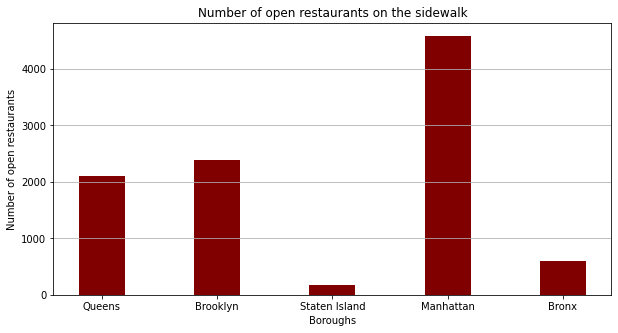

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5)) 
plt.bar(df_asw['Borough'], df_asw['count'], color ='maroon', width = 0.4) 
  
plt.xlabel("Boroughs") 
plt.ylabel("Number of open restaurants") 
plt.title("Number of open restaurants on the sidewalk") 
axes = plt.gca()
axes.yaxis.grid()
plt.show() 

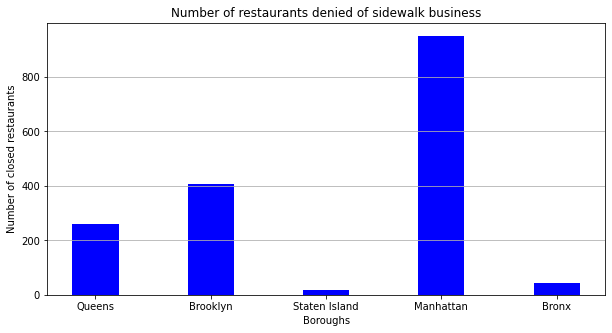

In [16]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(df_nasw['Borough'], df_nasw['count'], color ='blue', width = 0.4) 
  
plt.xlabel("Boroughs") 
plt.ylabel("Number of closed restaurants") 
plt.title("Number of restaurants denied of sidewalk business") 
axes = plt.gca()
axes.yaxis.grid()
plt.show() 

For roadway seating

In [17]:
df = df.withColumnRenamed("Approved for Roadway Seating","Approved_for_Roadway_Seating")

In [18]:
approved_roadway = df.filter("Approved_for_Roadway_Seating == 'yes'")
print((approved_roadway.count(), len(approved_roadway.columns)))

(7329, 35)


In [19]:
not_approved_roadway = df.filter("Approved_for_Roadway_Seating == 'no'")
print((not_approved_roadway.count(), len(not_approved_roadway.columns)))

(4186, 35)


In [20]:
approved_roadway_borough = approved_roadway.groupby("Borough").count()
not_approved_roadway_borough = not_approved_roadway.groupby("Borough").count()

In [21]:
df_arw = approved_roadway_borough.toPandas()
df_narw = not_approved_roadway_borough.toPandas()

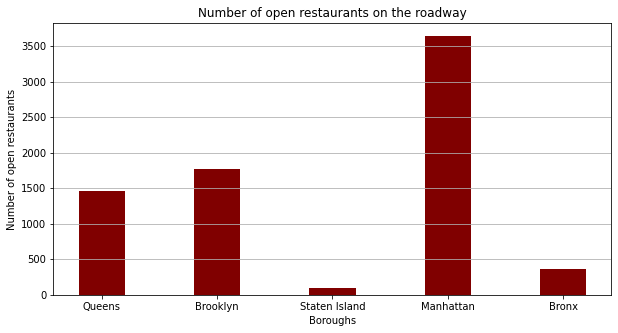

In [22]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(df_arw['Borough'], df_arw['count'], color ='maroon', width = 0.4) 
  
plt.xlabel("Boroughs") 
plt.ylabel("Number of open restaurants") 
plt.title("Number of open restaurants on the roadway") 
axes = plt.gca()
axes.yaxis.grid()
plt.show() 

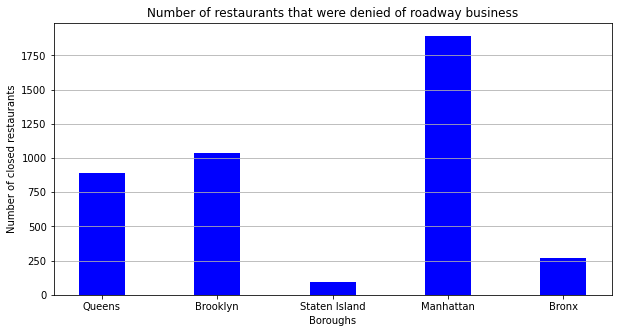

In [23]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(df_narw['Borough'], df_narw['count'], color ='blue', width = 0.4) 
  
plt.xlabel("Boroughs") 
plt.ylabel("Number of closed restaurants") 
plt.title("Number of restaurants that were denied of roadway business") 
axes = plt.gca()
axes.yaxis.grid()
plt.show() 

Closed restaurants

In [24]:
closed_rests = df.filter("Approved_for_Roadway_Seating == 'no' AND Approved_for_Sidewalk_Seating == 'no'")
print((closed_rests.count(), len(closed_rests.columns)))

(363, 35)


In [25]:
closed_rests_borough = closed_rests.groupby("Borough").count()

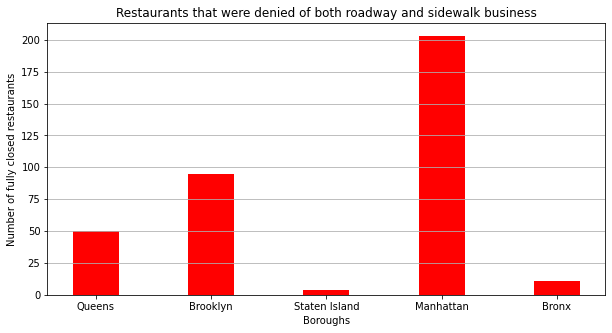

In [26]:
df_cr = closed_rests_borough.toPandas()

fig = plt.figure(figsize = (10, 5)) 
plt.bar(df_cr['Borough'], df_cr['count'], color ='red', width = 0.4) 
  
plt.xlabel("Boroughs") 
plt.ylabel("Number of fully closed restaurants") 
plt.title("Restaurants that were denied of both roadway and sidewalk business") 
axes = plt.gca()
axes.yaxis.grid()
plt.show() 

Mobility data for NYC

In [27]:
df_mob = spark.read.format("csv").option("header", "true").load("/content/2020_US_Region_Mobility_Report.csv")
print((df_mob.count(), len(df_mob.columns)))

(727719, 14)


In [28]:
df_mob.printSchema()

root
 |-- country_region_code: string (nullable = true)
 |-- country_region: string (nullable = true)
 |-- sub_region_1: string (nullable = true)
 |-- sub_region_2: string (nullable = true)
 |-- metro_area: string (nullable = true)
 |-- iso_3166_2_code: string (nullable = true)
 |-- census_fips_code: string (nullable = true)
 |-- date: string (nullable = true)
 |-- retail_and_recreation_percent_change_from_baseline: string (nullable = true)
 |-- grocery_and_pharmacy_percent_change_from_baseline: string (nullable = true)
 |-- parks_percent_change_from_baseline: string (nullable = true)
 |-- transit_stations_percent_change_from_baseline: string (nullable = true)
 |-- workplaces_percent_change_from_baseline: string (nullable = true)
 |-- residential_percent_change_from_baseline: string (nullable = true)



In [29]:
df_staten = df_mob.filter("sub_region_1 == 'New York' AND sub_region_2 == 'Richmond County'")
print((df_staten.count(), len(df_staten.columns)))

(289, 14)


In [30]:
df_kings = df_mob.filter("sub_region_1 == 'New York' AND sub_region_2 == 'Kings County'")
print((df_kings.count(), len(df_kings.columns)))

(289, 14)


In [31]:
df_queens = df_mob.filter("sub_region_1 == 'New York' AND sub_region_2 == 'Queens County'")
print((df_queens.count(), len(df_queens.columns)))

(289, 14)


In [32]:
df_NYC = df_mob.filter("sub_region_1 == 'New York' AND sub_region_2 == 'New York County'")
print((df_NYC.count(), len(df_NYC.columns)))

(289, 14)


In [33]:
df_bronx = df_mob.filter("sub_region_1 == 'New York' AND sub_region_2 == 'Bronx County'")
print((df_bronx.count(), len(df_bronx.columns)))

(289, 14)


In [34]:
req_col_list = ['date', 'retail_and_recreation_percent_change_from_baseline',\
                           'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline',\
                           'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline']

def convert_req(df_spark):
    df_pd = df_spark.toPandas()
    df_pd = df_pd[req_col_list]
    df_pd = df_pd.set_index(['date']) 
    return df_pd


In [35]:
from sklearn.preprocessing import MinMaxScaler

def data_scaler(df):
    scaler = MinMaxScaler(feature_range=(-1,1))
    scaler.fit(df)
    df_scaled = scaler.transform(df)
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
    return df_scaled


In [36]:
from scipy.signal import savgol_filter

def plot_foot_traffic(df_scaled, borough):
    cols = df_scaled.columns
    filter_window = 91
    fig = plt.figure(figsize = (17, 10))

    for i in range(len(cols)):
        plt.plot(savgol_filter(df_scaled[cols[i]], filter_window, 3), linewidth=2.5)

    plt.plot(savgol_filter(data_scaler(all_covid_curves[borough]).to_numpy().reshape(len(res)), 21, 3), 'k--',linewidth=3.5)
    plt.rcParams.update({'font.size': 14})
    plt.legend(cols)

    leg = plt.legend(cols)
    leg_lines = leg.get_lines()
    plt.setp(leg_lines, linewidth=4)

    plt.xlabel("Days(from Feb-15)")
    plt.ylabel("Percentage change in foot traffic",fontsize=16) 
    plt.title(f'Foot traffic for {borough}',fontsize=16) 
    plt.show() 

    return

In [37]:
df_covid = spark.read.format("csv").option("header", "true").load("/content/time_series_covid19_confirmed_US.csv")
print((df_covid.count(), len(df_covid.columns)))

(3340, 318)


In [40]:
df_covid_kings = df_covid.filter("Province_State == 'New York' AND Admin2 == 'Kings'")
print((df_covid_kings.count(), len(df_covid_kings.columns)))

df_covid_queens = df_covid.filter("Province_State == 'New York' AND Admin2 == 'Queens'")
print((df_covid_queens.count(), len(df_covid_queens.columns)))

df_covid_nyc = df_covid.filter("Province_State == 'New York' AND Admin2 == 'New York'")
print((df_covid_nyc.count(), len(df_covid_nyc.columns)))

df_covid_bronx = df_covid.filter("Province_State == 'New York' AND Admin2 == 'Bronx'")
print((df_covid_bronx.count(), len(df_covid_bronx.columns)))

df_covid_richmond = df_covid.filter("Province_State == 'New York' AND Admin2 == 'Richmond'")
print((df_covid_richmond.count(), len(df_covid_richmond.columns)))

(1, 318)
(1, 318)
(1, 318)
(1, 318)
(1, 318)


In [41]:
all_covid_curves = {'Bronx' : None,
                 'Queens' : None,
                 'Brooklyn' : None,
                 'Manhattan' : None,
                 'Staten Island' : None 
                 }

In [42]:
all_cov_spark_dfs = [df_covid_kings, df_covid_queens, df_covid_nyc, df_covid_bronx, df_covid_richmond]
boroughs = ['Brooklyn', 'Queens', 'Manhattan', 'Bronx', 'Staten Island']

for i,b in zip(all_cov_spark_dfs, boroughs):
    df_covid_pd = i.toPandas()
    covid_cols = df_covid_pd.columns
    new_df = df_covid_pd[covid_cols[35:]]
    new_df_T = new_df.T
    new_df_T = new_df_T.astype(int)
    res = new_df_T.diff().fillna(new_df_T)

    all_covid_curves[b] = res


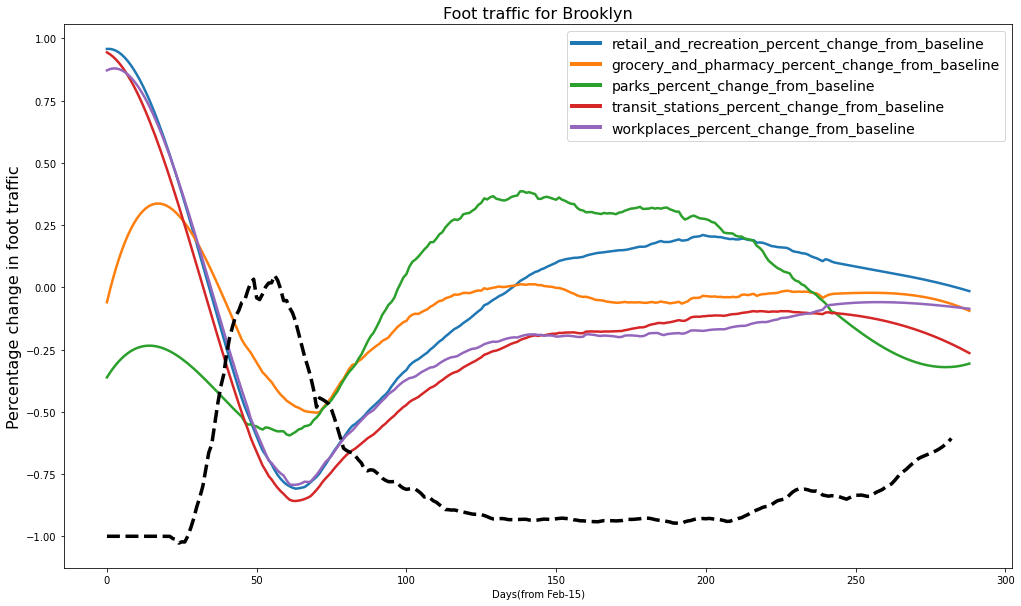

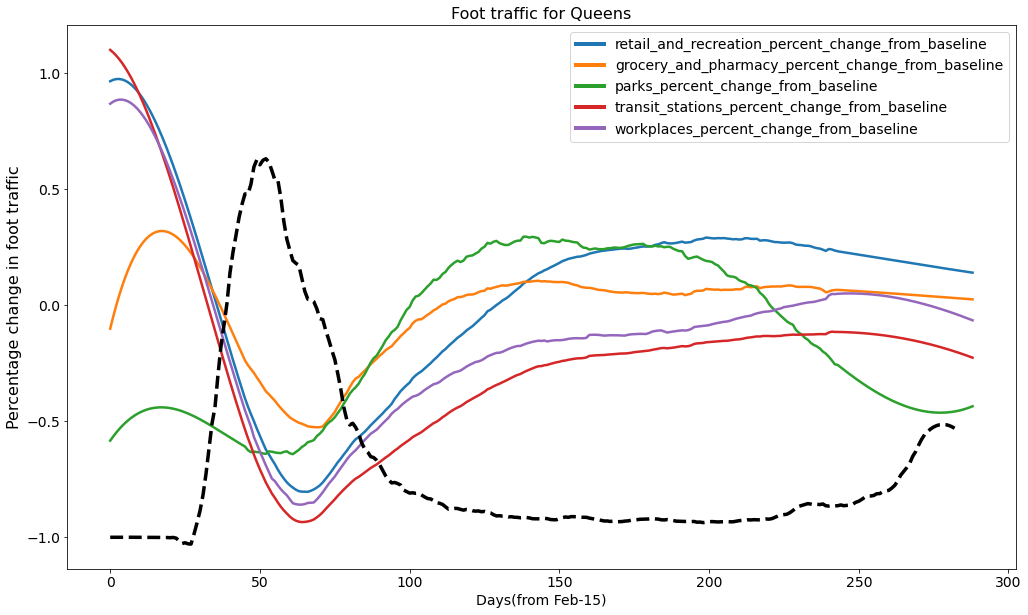

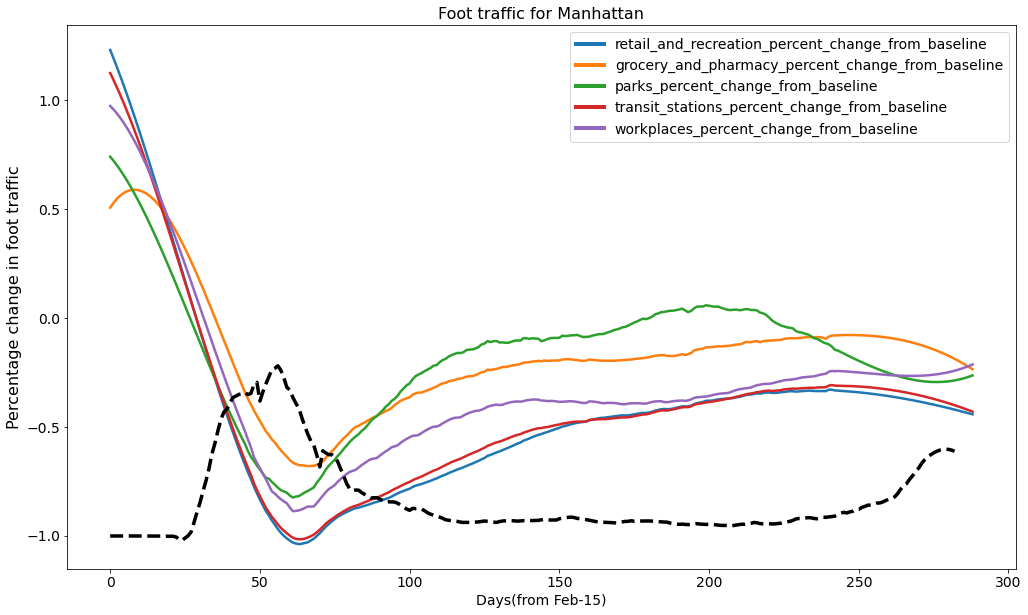

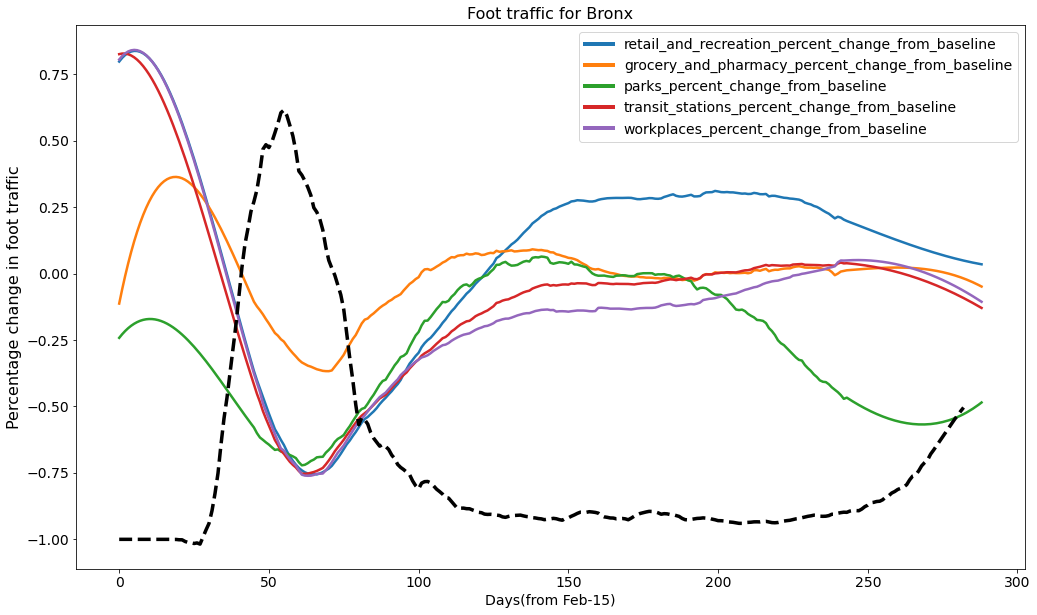

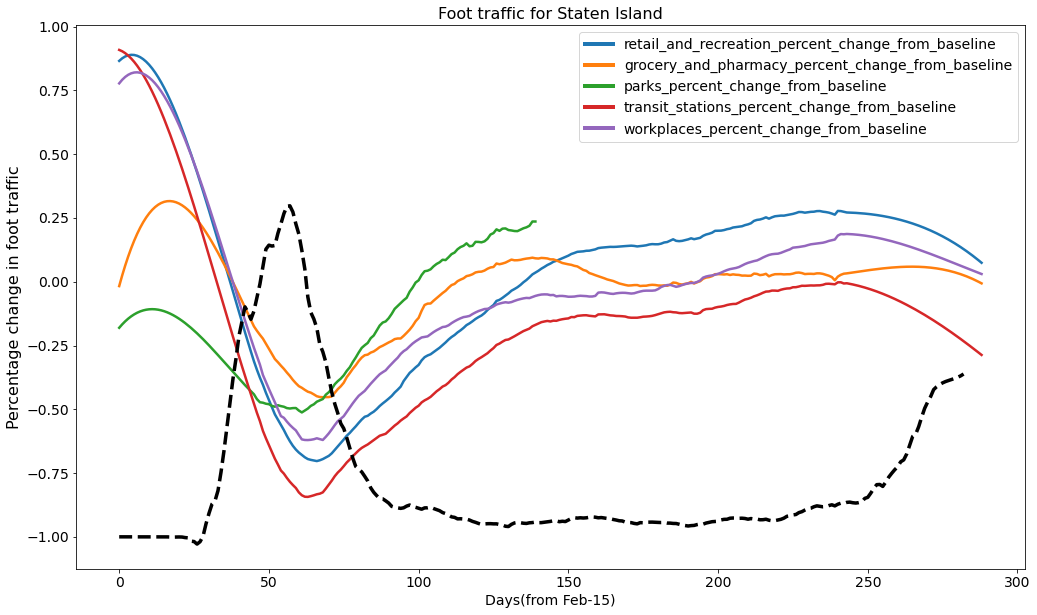

In [43]:
spark_dfs = [df_kings, df_queens, df_NYC, df_bronx, df_staten]
boroughs = ['Brooklyn', 'Queens', 'Manhattan', 'Bronx', 'Staten Island']

for spark_df, borough in zip(spark_dfs, boroughs):
    df_pd = convert_req(spark_df)
    df_scaled = data_scaler(df_pd)
    plot_foot_traffic(df_scaled, borough)
